## Task_9. Python применение продвинутых методов

### Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

_Mobile Games AB Testing with Cookie Cats - [Kaggle dataset](https://www.kaggle.com/code/mursideyarkin/mobile-games-ab-testing-with-cookie-cats/input)_

In [235]:
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Подготовка данных

In [236]:
data = pd.read_excel('./files/результаты А_B.xlsx')

In [237]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


* userid - a unique number that identifies each player.
* version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [239]:
data.describe(include='all')

,userid,version,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189,90189.000000,90189.000000,90189.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,gate_40,NaN,NaN,NaN
freq,NaN,45489,NaN,NaN,NaN
mean,4.998412e+06,NaN,51.872457,0.445210,0.186065
std,2.883286e+06,NaN,195.050858,0.496992,0.389161
min,1.160000e+02,NaN,0.000000,0.000000,0.000000
25%,2.512230e+06,NaN,5.000000,0.000000,0.000000
50%,4.995815e+06,NaN,16.000000,0.000000,0.000000
75%,7.496452e+06,NaN,51.000000,1.000000,0.000000


In [240]:
# Поиск пропусков в данных
data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [241]:
data.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

Так как количество уникальных пользователей 90189, совпадает с количеством строк версий, то данные распределены корректно.<p>
1 пользователь = 1 версия

In [242]:
data.version.value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [243]:
data.groupby('version').agg({'retention_1': ['value_counts'] , 'retention_7': ['value_counts'] })

retention_1  retention_7
          value_counts value_counts
version                            
gate_30 0        24666        36198
        1        20034         8502
gate_40 0        25370        37210
        1        20119         8279

In [244]:
data.groupby('version').agg({'sum_gamerounds': 'sum'})

,sum_gamerounds
version,
gate_30,2344795
gate_40,2333530


In [245]:
gate_30 = data.query('version == "gate_30"')
gate_40 = data.query('version == "gate_40"')

In [246]:
gate_30.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,52.456264,0.448188,0.190201
std,2.881026e+06,256.716423,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,49854.000000,1.000000,1.000000


In [247]:
gate_40.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.548900e+04,45489.000000,45489.000000,45489.000000
mean,5.009073e+06,51.298776,0.442283,0.182000
std,2.885496e+06,103.294416,0.496663,0.385849
min,3.770000e+02,0.000000,0.000000,0.000000
25%,2.517171e+06,5.000000,0.000000,0.000000
50%,5.007329e+06,16.000000,0.000000,0.000000
75%,7.510762e+06,52.000000,1.000000,0.000000
max,9.999861e+06,2640.000000,1.000000,1.000000


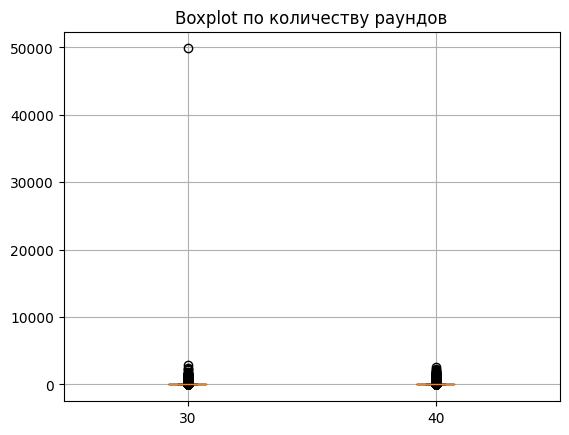

In [260]:
plt.boxplot([gate_30.sum_gamerounds, gate_40.sum_gamerounds], labels=['30','40'])

plt.title('Boxplot по количеству раундов')
plt.grid(axis='both');

In [249]:
# без учета вылета в контрольной группе
gate_30[gate_30['sum_gamerounds'] != 49854].describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.469900e+04,44699.000000,44699.000000,44699.000000
mean,4.987532e+06,51.342111,0.448198,0.190183
std,2.881051e+06,102.057598,0.497315,0.392450
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505463e+06,5.000000,0.000000,0.000000
50%,4.983630e+06,17.000000,0.000000,0.000000
75%,7.481522e+06,50.000000,1.000000,0.000000
max,9.999710e+06,2961.000000,1.000000,1.000000


### Проверка данных на статистические различия

In [250]:
from statsmodels.stats import proportion

* retention_1

In [251]:
# Общее количество
n1 = gate_30.retention_1.value_counts().sum()
n2 = gate_40.retention_1.value_counts().sum()

# Количество вернувшихся клиентов 
k1 = gate_30.retention_1.value_counts()[1]
k2 = gate_40.retention_1.value_counts()[1]

In [252]:
# Тест Хи-квадрат для конверсии в покупку

chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =3.183, pvalue = 0.074


In [253]:
# z-тест
alpha = 0.05
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), np.array([n1, n2]))

print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))
print('Статистические различия {} обнаружены\n'.format({True:'не', False:''}[z_pvalue > alpha]));

Results are  z_score =1.784, pvalue = 0.074
Статистические различия не обнаружены



Pvalue > alpha (0.74 > 0.05), статистическич различий по retention_1 в группах нет.

* retention_7

In [254]:
# Общее количество
n11 = gate_30.retention_7.value_counts().sum()
n22 = gate_40.retention_7.value_counts().sum()

# Количество вернувшихся клиентов 
k11 = gate_30.retention_7.value_counts()[1]
k22 = gate_40.retention_7.value_counts()[1]

In [255]:
# Тест Хи-квадрат для конверсии в покупку

chisq, pvalue, table = proportion.proportions_chisquare(np.array([k11, k22]), np.array([n11, n22]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =10.013, pvalue = 0.002


In [256]:
# z-тест
alpha = 0.05
z_score, z_pvalue = proportion.proportions_ztest(np.array([k11, k22]), np.array([n11, n22]))

print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))
print('Статистические различия {} обнаружены\n'.format({True:'не', False:''}[z_pvalue > alpha]));

Results are  z_score =3.164, pvalue = 0.002
Статистические различия  обнаружены



Pvalue < alpha (0.002 < 0.05), статистическич различий по retention_7 есть.

In [257]:
g30 = gate_30[gate_30['retention_1'] == 1].sum_gamerounds
g40 = gate_40[gate_40['retention_1'] == 1].sum_gamerounds

# Двухвыборочный тест с независимыми выборками
stats.ttest_ind(g30, g40)

TtestResult(statistic=-0.7117397153010641, pvalue=0.47663010465013667, df=40151.0)

In [258]:
g30_7 = gate_30[gate_30['retention_7'] == 1].sum_gamerounds
g40_7 = gate_40[gate_40['retention_7'] == 1].sum_gamerounds

# Двухвыборочный тест с независимыми выборками
stats.ttest_ind(g30_7, g40_7)

TtestResult(statistic=0.04770958692373003, pvalue=0.9619482613634911, df=16779.0)

В retention_1 и retention_7 cтатистических различий между колличеством уровней в контрольной и тестируемой группе не обнаружено.

#### Вывод: 
Данные распределены корректно - количество уникальных пользователей 90189, совпадает с количеством строк версий, отсутствуют пустые строки и минусовые значения.<p>

* Процент по возвращаемости в 1 день в контрольной группе больше - 44,8% vs 44,2%
* Процент по возвращаемости за 7 дней в контрольной группе больше - 19,02% vs 18,2%

* Среднее по колличеству раундов в игре в контрольной группе выше - 52,45 vs 51,29, также и без учета вылета (49854) - 51.34.

* Статистических различий по возвращаемости в 1 день в группах нет.
* Есть статистические различия по возвращаемости за 7 дней.
* За 1-ый и за 7-ой день cтатистических различий между колличеством уровней в контрольной и тестируемой группе не обнаружено.

Есть статистические различия по возвращаемости за 7 дней, контрольная группа показывает себя лучше, оставляем без изменений.